In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
import pandas as pd
plt.ion()

In [3]:
def plot_boundary(clf, X, y):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    Nbins = 300
    dx = max((x_max- x_min)/Nbins, (y_max- y_min)/Nbins) #  0.002 <--> Nbins=500 ## grid mesh size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, dx),
                         np.arange(y_min, y_max, dx))

    ## prediction value by zone
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ## crée une nouvelle figure (avec le numero suivant de la figure de numeor le plus grand)
    plt.figure(figsize=[5,5]) ## equal x and y lengths for a squared figure
    ## plot du fond avec une couleur selon la valeur de Z(x,y)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    ## plot des points de données ##
    plt.scatter(X[:, 0], X[:, 1], c=y, s = 100)
    ## plot des vecteurs supports ##
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1], c = 'green', s = 200, marker='+')

    plt.title('(training) "score" : ' + str(clf.score(X,y)))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.xlim([0,1])
    plt.ylim([0,1])

In [4]:
##########################################################
## data set 1 ##
print("Cas du carré de points linéairement séparable.\n")

def make_separable_square(Nset, seed):
    np.random.seed(seed)
    X = np.random.random_sample( (Nset,2) )
    y = (X[:,0] > 0.5)
    return X,y

N = 100
D = 2
val = N//3
seed = 42
X, y       = make_separable_square(N, seed)
Xval, yval = X[:val], y[:val] ## générer un validation set.
Xtrain, ytrain = X[val:], y[val:] ## générer un train set.

##########################################################

Cas du carré de points linéairement séparable.



In [5]:
import sklearn.svm

No handles with labels found to put in legend.


training score: 0.9850746268656716
validation score: 1.0


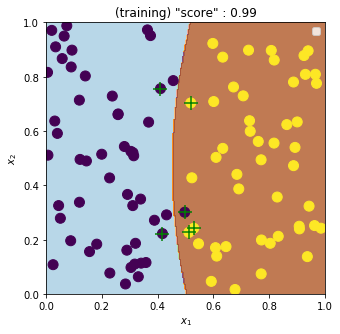

In [6]:
## TODO: entrainer le modele: choisir un SVM lineaire, pour le moment.
## TODO: definir la valeur des hyper-parametres du modele

clf = sklearn.svm.SVC(kernel='poly')

## TODO entrainer le modele (1 ligne)
clf.fit(Xtrain,ytrain)
y_pred = clf.predict(Xtrain)
#clf.coef_ ##vecteur w
print("training score:",clf.score(Xtrain,ytrain))
print("validation score:",clf.score(Xval,yval))

plot_boundary(clf,X,y)

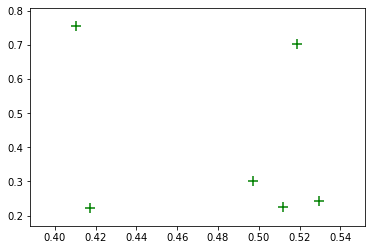

In [7]:
####################################################################################
## TODO : recuperer les vecteurs supports, en utilisant l'objet "clf"
suppVect = clf.support_vectors_
size=100
plt.scatter(suppVect[:,0],suppVect[:,1], c = 'green', s = size, marker='+')


## TODO: tracer aussi les points de l'ensemble de validation (en plus petits, ou autres couleur, etc)
valPt = clf.n_support_
plt.scatter(valPt[:0],valPt[:0], c = 'red', s = size, marker='x')

In [8]:
## interrompt le programme ici (TODO: une fois le cas sans bruit terminé, effacer/commenter cette ligne:
#raise SystemExit

##########################################################
## data set 2 ##
print("\n\nOn passe au cas bruité: le data set n'est PLUS linéairement séparable !!\n\n")
import random
def make_noisy_square(Nset, p, seed):
    np.random.seed(seed)
    X = np.random.rand( Nset,2 )
    y = X[:,0] > 0.5
    ## now we add some noise
## TODO : ajouter du bruit, sous la forme d'une inversion
## des labels  (0->1, 1->0) pour une fraction p des points (prise aléatoirement) 
#    switched_filter = np.random.random(Nset) < p
#    y[switched_filter] = 1 - y[switched_filter]
    
    for P in range (0,int(p*X.shape[0])) :
        pos = random.randint(0,D)
        if(y[pos]== 1):
            y[pos] = 0
        else : 
            y[pos] = 1
    return X,y

Nset = 20
valSet = 20//3
p = 0.1 
X, y       = make_noisy_square(Nset, p, 42)
Xval, yval = X[:valSet], y[:valSet]
X, y = X[valSet:], y[valSet:]
##########################################################



On passe au cas bruité: le data set n'est PLUS linéairement séparable !!




No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

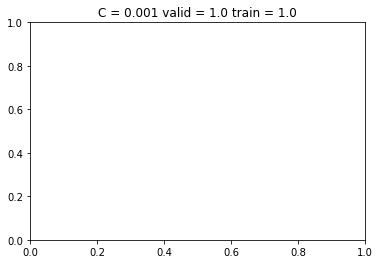

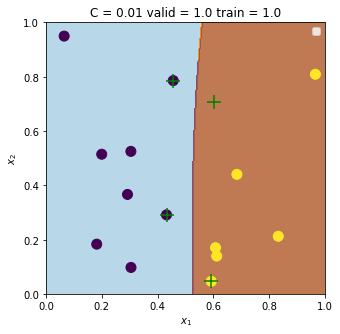

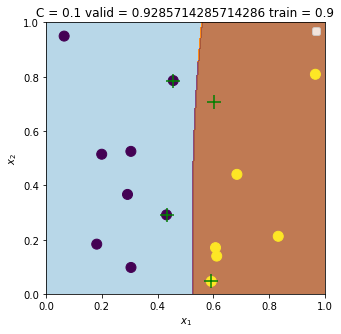

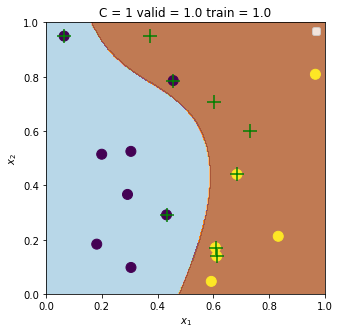

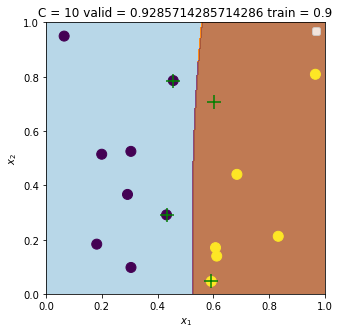

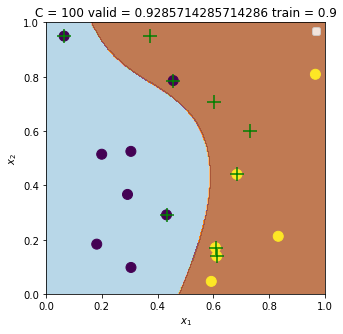

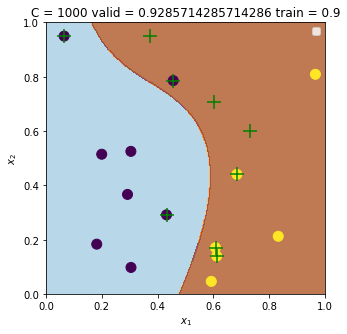

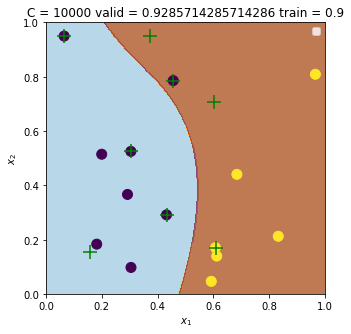

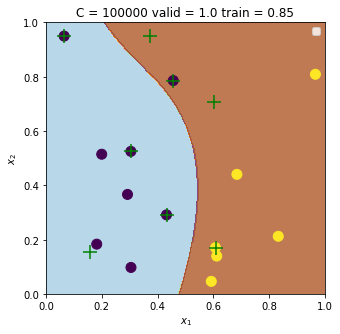

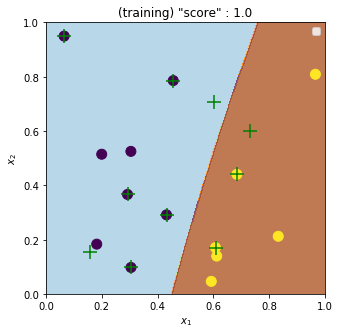

<Figure size 432x288 with 0 Axes>

In [10]:
## afin d'enregistrer les scores au fur et a mesure, on definit des listes
## en python, les listes sont tres inefficientes, mais pour une dizaines de valeurs, ca va.
linear_training_score = []
linear_valid_score = []
Cvalues=[]
for C in [10**x for x in range(-3,6,1)]:
    ## TODO: pas mal de choses:
    ## - definir un modele
    ## - l'entrainer
    ## - predire/calculer le score de train et de validation
    
    #définir un modèle
    X, y       = make_noisy_square(Nset, p, 42)
    Xval, yval = X[:valSet], y[:valSet]
    Xtrain, ytrain = X[valSet:], y[valSet:]

    #entrainer le modèle
    clf.fit(X,y)
    y_pred = clf.predict(X)
    
    #calculer le score de train et validation
    trainscore = clf.score(X,y)
    validscore = clf.score(Xtrain, ytrain)
    
    linear_training_score.append(trainscore)
    linear_valid_score.append(   validscore)
    Cvalues.append(C)

    # tracer les donnees, les vecteurs supports, et la frontière de décision
    ## (utiliser la fonction plot_boundary)
    plt.title('C = ' + str(C) + " valid = " + str(validscore) + " train = " + str(trainscore)) ## il serait malin de pouvoir identifier les figures
    plot_boundary(clf, Xtrain, ytrain)
    
plt.figure()
## TODO: tracer les performances en fonction de C
## astuce: la fonction plt.semliogx permet de faire un plot
## en echelle semi-logarithmique


## interrompt le programme ici
#raise SystemExit
########################################
